In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:

# Dictionary mapping model names to their respective pickle file paths
files = {
    'Linear Regression': '/path/to/RESULTS/RMSE_MAE/metrics_df_linear.pkl',
    'Winter-Holts': '/path/to/RESULTS/RMSE_MAE/metrics_df_Holts.pkl',
    'LGBM-item': '/path/to/RESULTS/RMSE_MAE/metrics_df_LGBMitem.pkl',
    'LGBM-cat': '/path/to/RESULTS/RMSE_MAE/metrics_df_LGBMcat.pkl',
    'LGBM-store': '/path/to/RESULTS/RMSE_MAE/metrics_df_LGBMstore.pkl',
    'LSTM': '/path/to/RESULTS/RMSE_MAE/metrics_df_LSTM.pkl'
}

# Load each dataframe, add a column to indicate model, and combine them
dfs = []
for model, filepath in files.items():
    with open(filepath, 'rb') as f:
        df = pickle.load(f, fix_imports=True)
    df['model'] = model
    dfs.append(df)
    
all_df = pd.concat(dfs, ignore_index=True)

# List of models (for iteration and labeling)
models = all_df['model'].unique()

palette = dict(zip(models, sns.color_palette('tab10', n_colors=len(models))))

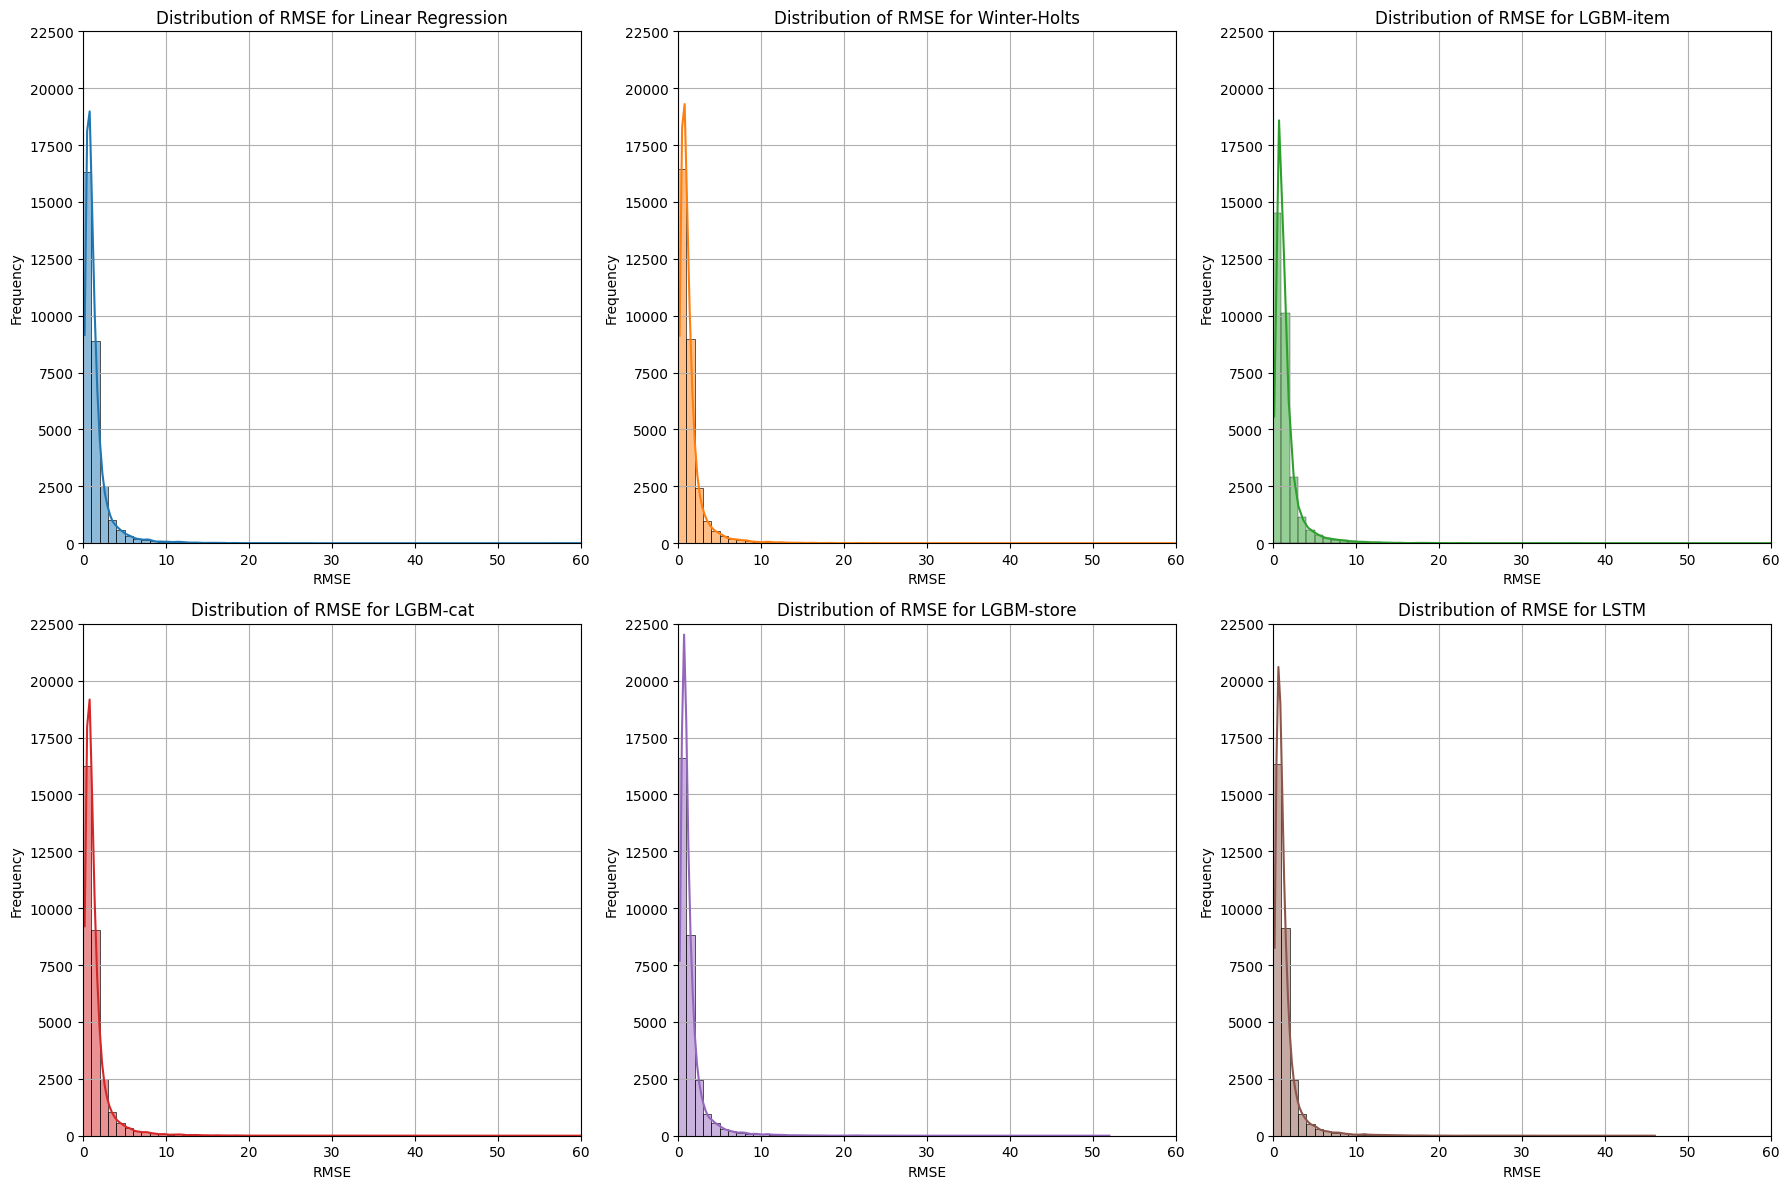

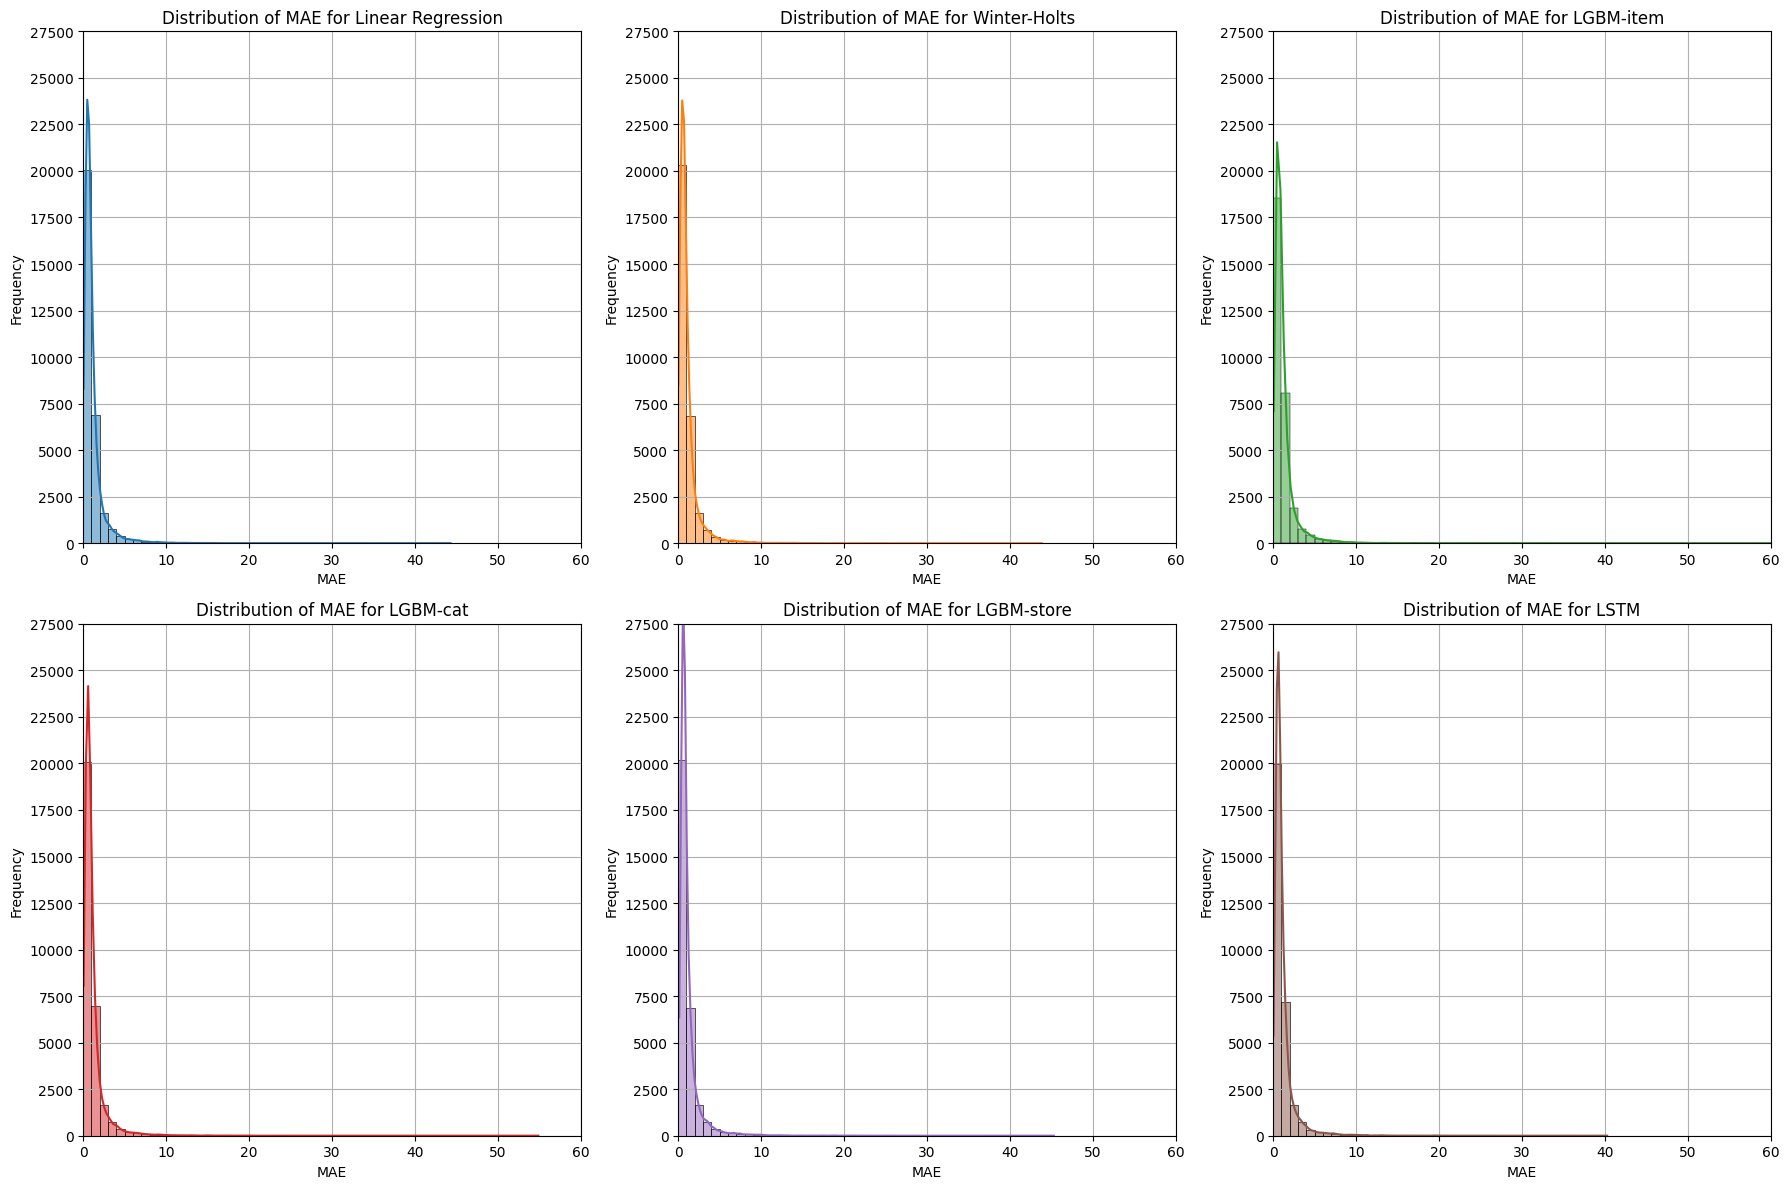

In [5]:
def plot_distribution(metric, title_suffix, x_max_cap=60, y_max_cap=25000):
    # Calculate the global minimum and force max to x_max_cap
    global_x_min = int(all_df[metric].min())
    global_x_max = x_max_cap

    # Bin width = 1
    bin_width = 1
    bins = np.arange(global_x_min, global_x_max + bin_width, bin_width)

    # Set x-axis ticks every 10 units
    x_ticks = np.arange(global_x_min, global_x_max + 10, 10)

    # Plot: Create a 2x3 grid for the 6 subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, model in enumerate(models):
        subset = all_df[all_df['model'] == model]
        sns.histplot(subset[metric], bins=bins, kde=True, color=palette[model], ax=axes[i])
        axes[i].set_title(f'{title_suffix} for {model}')
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel('Frequency')
        axes[i].set_xticks(x_ticks)
        axes[i].set_xlim(global_x_min, global_x_max)
        axes[i].set_ylim(0, y_max_cap)  # Set custom y-axis limit
        axes[i].set_yticks(np.arange(0, y_max_cap + 1, 2500))
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# 1) RMSE with y-axis capped at 22,500
plot_distribution(metric='RMSE', title_suffix='Distribution of RMSE', y_max_cap=22500)

# 2) MAE with y-axis capped at 27,500
plot_distribution(metric='MAE', title_suffix='Distribution of MAE', y_max_cap=27500)

/tmp/ipykernel_17625/1642391580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_rmse = sns.boxplot(x='model', y='RMSE', data=all_df,  palette='tab10')


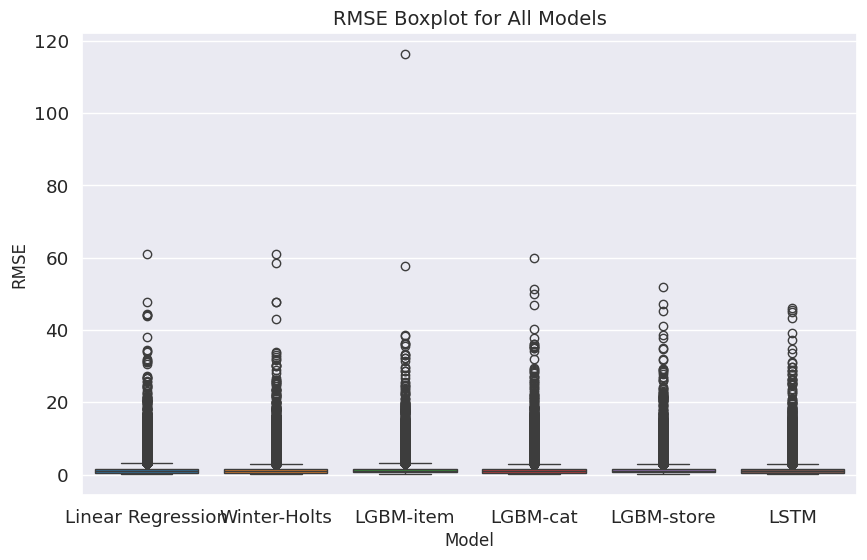

/tmp/ipykernel_17625/1642391580.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_mae = sns.boxplot(x='model', y='MAE', data=all_df, palette='tab10')


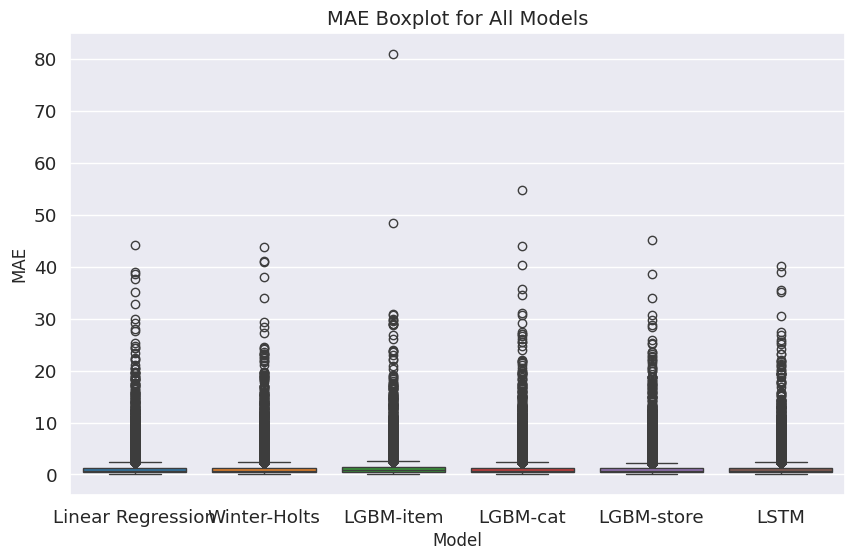

In [6]:
# Set Seaborn style for a cleaner look
sns.set(style="darkgrid", font_scale=1.2)

# 3) Boxplot for all models RMSE with improved aesthetics
plt.figure(figsize=(10, 6))
ax_rmse = sns.boxplot(x='model', y='RMSE', data=all_df,  palette='tab10')
ax_rmse.set_title('RMSE Boxplot for All Models', fontsize=14)
ax_rmse.set_xlabel('Model', fontsize=12)
ax_rmse.set_ylabel('RMSE', fontsize=12)
plt.show()

# 4) Boxplot for all models MAE with improved aesthetics
plt.figure(figsize=(10, 6))
ax_mae = sns.boxplot(x='model', y='MAE', data=all_df, palette='tab10')
ax_mae.set_title('MAE Boxplot for All Models', fontsize=14)
ax_mae.set_xlabel('Model', fontsize=12)
ax_mae.set_ylabel('MAE', fontsize=12)
plt.show()

